<H1>MAPK8IP3 genotype phenotype correlations</H1>

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f'hpotk version {hpotk.__version__}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2023-10-09
hpotk version 0.5.2
Using gpsea version 0.2.1.dev0


### Setup

Here we specificy the path to the folder with the phenopackets to be analyzed, and the transcript to be used for the analysis (in general, the MANE transcript should be used). Here, we use the transcript `NM_001318852.2` which is the MANE transcript of the *MAPK8IP3* gene.

In [2]:
MAPK8IP3_id = 'NM_001318852.2'

### Create the cohort

Load and validate the phenopackets

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_name = 'MAPK8IP3'
phenopacket_store_release = '0.1.18'

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)

validation.summarize()

Patients Created: 100%|██████████| 20/20 [00:00<00:00, 299.27it/s]
Validated under none policy
No errors or warnings were found


In [4]:
from IPython.display import display, HTML
from gpsea.view import CohortViewable

viewer = CohortViewable(hpo)
display(HTML(viewer.process(cohort=cohort, transcript_id=MAPK8IP3_id)))

HPO Term,ID,Seen in n individuals
Global developmental delay,HP:0001263,19
Hypotonia,HP:0001252,11
Thin corpus callosum,HP:0033725,9
"Intellectual disability, moderate",HP:0002342,7
Intellectual disability,HP:0001249,6
Spastic diplegia,HP:0001264,6
Delayed ability to walk,HP:0031936,6
Seizure,HP:0001250,6
Cerebral atrophy,HP:0002059,5
Thin upper lip vermilion,HP:0000219,5


<Axes: title={'center': 'C-Jun-amino-terminal kinase-interacting protein 3\ntranscript: NM_001318852.2, protein: NP_055948.2'}>

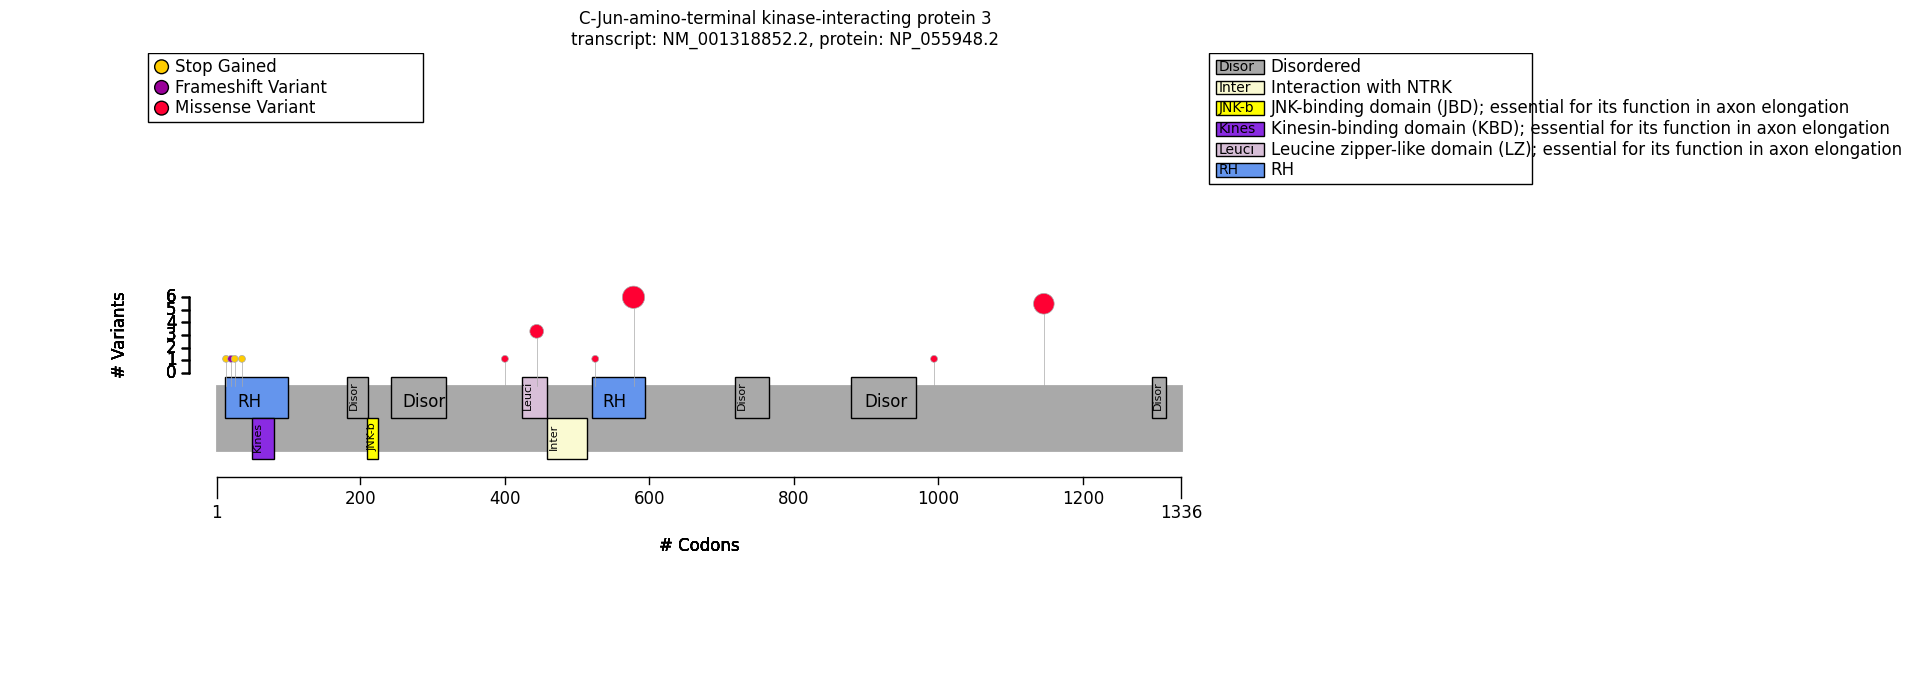

In [5]:
from gpsea.preprocessing import configure_protein_metadata_service
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import VVMultiCoordinateService
from gpsea.view import ProteinVisualizable, ProteinVisualizer

pms = configure_protein_metadata_service()
protein_meta = pms.annotate('NP_055948.2')
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(MAPK8IP3_id)

pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

## Configure the analysis
For the first run, we will not remove unneeded terms prior to statistical analysis

In [6]:
from gpsea.analysis import configure_cohort_analysis, CohortAnalysisConfiguration

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = True
analysis_config.pval_correction = 'fdr_bh'
analysis_config.all_terms_strategy()
hpo_analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [7]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import PatientCategories
from gpsea.analysis.predicate.genotype import VariantPredicates

is_frameshift = VariantPredicates.variant_effect(
    VariantEffect.FRAMESHIFT_VARIANT, tx_id=MAPK8IP3_id,
)

frameshift = hpo_analysis.compare_hpo_vs_genotype(is_frameshift)
frameshift.summarize(hpo, PatientCategories.YES)

FRAMESHIFT_VARIANT on NM_001318852.2         Yes             No          \
                                           Count Percent  Count Percent   
Autism [HP:0000717]                          1/1    100%   1/14      7%   
Abnormality of movement [HP:0100022]         0/1      0%   8/13     62%   
Upslanted palpebral fissure [HP:0000582]     0/0      0%    1/6     17%   
Abnormal eye morphology [HP:0012372]         0/0      0%    3/3    100%   
Abnormality of the integument [HP:0001574]   0/0      0%    3/3    100%   
...                                          ...     ...    ...     ...   
Abnormal joint morphology [HP:0001367]       0/0      0%    2/2    100%   
Abnormal eyelid morphology [HP:0000492]      0/0      0%    2/2    100%   
Limb joint contracture [HP:0003121]          0/0      0%    1/1    100%   
Abnormality of the head [HP:0000234]         0/0      0%  10/10    100%   
Persistent head lag [HP:0032988]             0/0      0%    2/5     40%   

FRAMESHIFT_VARIANT on NM_001318852.2                                    
                                             p value Corrected p value  
Autism [HP:0000717]                         0.133333               1.0  
Abnormality of movement [HP:0100022]        0.428571               1.0  
Upslanted palpebral fissure [HP:0000582]    1.000000               1.0  
Abnormal eye morphology [HP:0012372]        1.000000               1.0  
Abnormality of the integument [HP:0001574]  1.000000               1.0  
...                                              ...               ...  
Abnormal joint morphology [HP:0001367]      1.000000               1.0  
Abnormal eyelid morphology [HP:0000492]     1.000000               1.0  
Limb joint contracture [HP:0003121]         1.000000               1.0  
Abnormality of the head [HP:0000234]        1.000000               1.0  
Persistent head lag [HP:0032988]            1.000000               1.0  

[175 rows x 6 columns]

## Correlation analysis for c.1735C>T

`NM_001318852.2:c.1735C>T` is the most commonly encountered variant in our cohort. In the following code, we investigate whether this variant displays significant genotype-phenotype correlations.

For the purpose of the analysis, the variant is denoted by its key: `16_1762843_1762843_C_T`.

In [11]:
variant_key = '16_1762843_1762843_C_T'
is_variant = VariantPredicates.variant_key(variant_key)
by_variant = hpo_analysis.compare_hpo_vs_genotype(is_variant)
by_variant.summarize(hpo, PatientCategories.YES)

variant has ID of 16_1762843_1762843_C_T     Yes            No          \
                                           Count Percent Count Percent   
Seizure [HP:0001250]                         4/5     80%  2/13     15%   
Inability to walk [HP:0002540]               3/3    100%   1/8     12%   
Autistic behavior [HP:0000729]               0/3      0%   4/4    100%   
Gait disturbance [HP:0001288]                3/3    100%   2/8     25%   
Abnormality of movement [HP:0100022]         4/4    100%  4/10     40%   
...                                          ...     ...   ...     ...   
Abnormal upper lip morphology [HP:0000177]   4/4    100%   3/3    100%   
Abnormal joint morphology [HP:0001367]       1/1    100%   1/1    100%   
Abnormal eyelid morphology [HP:0000492]      0/0      0%   2/2    100%   
Limb joint contracture [HP:0003121]          1/1    100%   0/0      0%   
Abnormality of the head [HP:0000234]         5/5    100%   5/5    100%   

variant has ID of 16_1762843_1762843_C_T                                
                                             p value Corrected p value  
Seizure [HP:0001250]                        0.021709               1.0  
Inability to walk [HP:0002540]              0.024242               1.0  
Autistic behavior [HP:0000729]              0.028571               1.0  
Gait disturbance [HP:0001288]               0.060606               1.0  
Abnormality of movement [HP:0100022]        0.084915               1.0  
...                                              ...               ...  
Abnormal upper lip morphology [HP:0000177]  1.000000               1.0  
Abnormal joint morphology [HP:0001367]      1.000000               1.0  
Abnormal eyelid morphology [HP:0000492]     1.000000               1.0  
Limb joint contracture [HP:0003121]         1.000000               1.0  
Abnormality of the head [HP:0000234]        1.000000               1.0  

[175 rows x 6 columns]

TODO - finalize!

*-* EOF *-*